# Aprendizaje Automático (Machine Learning) 

## K-Means (Clustering - Algoritmo no supervisado) 

In [5]:
import pandas as pd 

In [6]:
ruta = 'CSV/Mall_Customers-2.csv'

In [7]:
df = pd.read_csv(ruta, index_col = 0)

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [10]:
df.rename({'Gender' : 'Genero', 
           'Age' : 'Edad',
           'Annual Income (k$)': 'Ingreso', 
           'Spending Score (1-100)': 'Gasto'},  axis=1, inplace=True)
# inpacle: Cambiar permanentemente 

In [11]:
df.head()

,Genero,Edad,Ingreso,Gasto
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## Análisis Exploratorio

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Ingreso,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Gasto,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [13]:
df.Genero.value_counts()

Genero
Female    112
Male       88
Name: count, dtype: int64

In [3]:
#!pip install matplotlib

In [4]:
import matplotlib

ValueError: Key backend: 'module://matplotlib_inline.backend_inline' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template', 'widget', 'ipympl']

## Segmentación Tradicional

In [16]:
df.Ingreso.plot.hist();

ValueError: Key backend: 'module://matplotlib_inline.backend_inline' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template', 'widget', 'ipympl']

In [11]:
import matplotlib.pyplot as plt, seaborn as sns
sns.set()

Text(0.5, 0, 'Ingreso anual en Miles de USD')

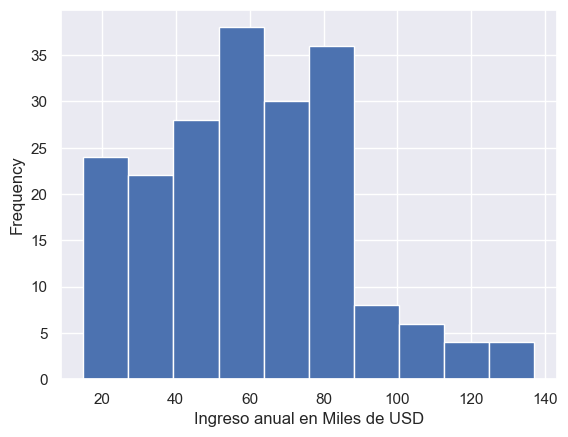

In [12]:
df.Ingreso.plot.hist()
plt.xlabel('Ingreso anual en Miles de USD')

### Reglas a seguir 
- Si ingreso < 50 entonces "Ingreso Bajo"
- Si 50 <= ingreso <= 90 entonces "Ingreso Moderado"
- Si Ingreso > 90 "Ingreso Alto"

In [13]:
import numpy as np 

In [14]:
df['Segmento'] = np.where(df.Ingreso >= 90, 'Ingreso alto', np.where(df.Ingreso < 50, 'Ingreso bajo', 'Ingreso Moderado'))

In [15]:
df

,Genero,Edad,Ingreso,Gasto,Segmento
CustomerID,,,,,
1,Male,19,15,39,Ingreso bajo
2,Male,21,15,81,Ingreso bajo
3,Female,20,16,6,Ingreso bajo
4,Female,23,16,77,Ingreso bajo
5,Female,31,17,40,Ingreso bajo
...,...,...,...,...,...
196,Female,35,120,79,Ingreso alto
197,Female,45,126,28,Ingreso alto
198,Male,32,126,74,Ingreso alto


In [16]:
df.Segmento.value_counts()

Segmento
Ingreso Moderado    106
Ingreso bajo         72
Ingreso alto         22
Name: count, dtype: int64

In [17]:
df.groupby('Segmento')['Ingreso'].describe()

,count,mean,std,min,25%,50%,75%,max
Segmento,,,,,,,,
Ingreso Moderado,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0
Ingreso alto,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Ingreso bajo,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0


## Estandarización de datos

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
col_a_escalar = ['Edad', 'Ingreso', 'Gasto']
datos_a_escalar = df.copy()

In [21]:
datos_a_escalar[col_a_escalar] = scaler.fit_transform(df[col_a_escalar])

In [22]:
datos_a_escalar

,Genero,Edad,Ingreso,Gasto,Segmento
CustomerID,,,,,
1,Male,-1.424569,-1.738999,-0.434801,Ingreso bajo
2,Male,-1.281035,-1.738999,1.195704,Ingreso bajo
3,Female,-1.352802,-1.700830,-1.715913,Ingreso bajo
4,Female,-1.137502,-1.700830,1.040418,Ingreso bajo
5,Female,-0.563369,-1.662660,-0.395980,Ingreso bajo
...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,Ingreso alto
197,Female,0.441365,2.497807,-0.861839,Ingreso alto
198,Male,-0.491602,2.497807,0.923953,Ingreso alto


In [23]:
df

,Genero,Edad,Ingreso,Gasto,Segmento
CustomerID,,,,,
1,Male,19,15,39,Ingreso bajo
2,Male,21,15,81,Ingreso bajo
3,Female,20,16,6,Ingreso bajo
4,Female,23,16,77,Ingreso bajo
5,Female,31,17,40,Ingreso bajo
...,...,...,...,...,...
196,Female,35,120,79,Ingreso alto
197,Female,45,126,28,Ingreso alto
198,Male,32,126,74,Ingreso alto


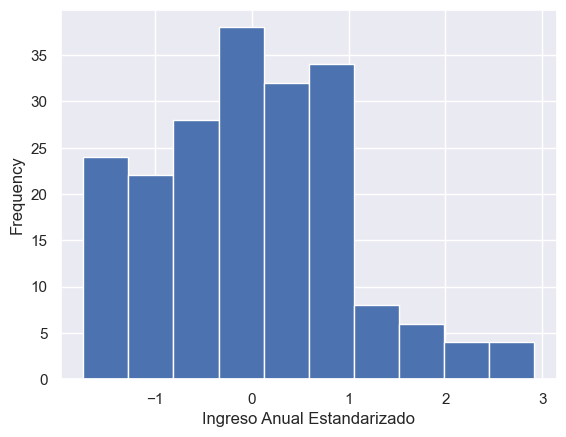

In [24]:
datos_a_escalar.Ingreso.plot.hist()
plt.xlabel('Ingreso Anual Estandarizado');

<Axes: xlabel='Ingreso', ylabel='Gasto'>

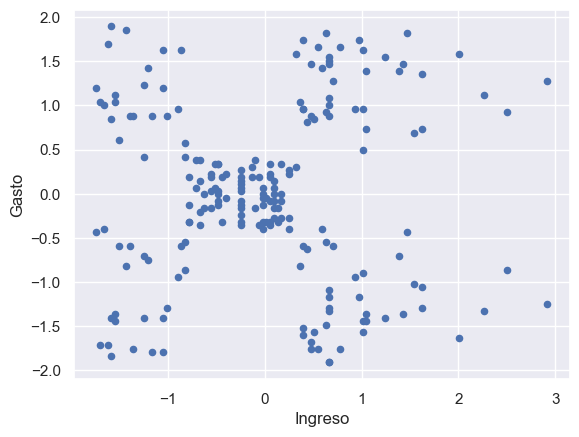

In [25]:
cluster_cols = ['Ingreso', 'Gasto']
datos_a_escalar.plot.scatter(x='Ingreso', y='Gasto')

## Uso de K-Means

In [26]:
from sklearn.cluster import KMeans

In [27]:
modelo = KMeans(n_clusters=5, random_state=12)

In [28]:
modelo.fit(datos_a_escalar[cluster_cols])

KMeans(n_clusters=5, random_state=12)

In [29]:
datos_a_escalar['Segmento2'] = modelo.predict(datos_a_escalar[cluster_cols])

In [30]:
datos_a_escalar.Segmento.value_counts()

Segmento
Ingreso Moderado    106
Ingreso bajo         72
Ingreso alto         22
Name: count, dtype: int64

In [31]:
datos_a_escalar.Segmento2.value_counts()

Segmento2
1    81
3    39
2    35
0    23
4    22
Name: count, dtype: int64

In [32]:
marcador = ['x', '*', '.', '-', '|', '_']

ValueError: Unrecognized marker style '-'

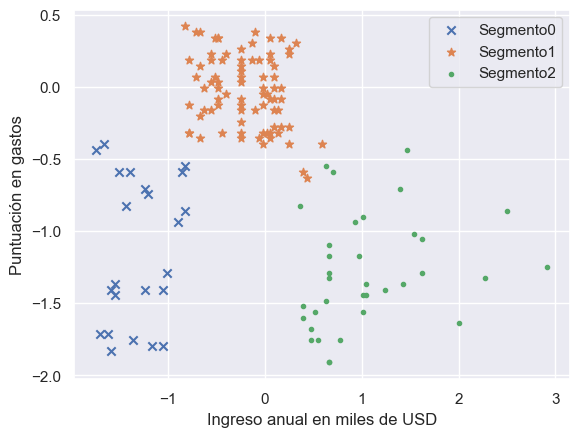

In [33]:
for segmento in range(5):
    temporal = datos_a_escalar[datos_a_escalar.Segmento2 == segmento]
    plt.scatter(temporal.Ingreso, temporal.Gasto, marker=marcador[segmento], label='Segmento'+str(segmento))
    plt.xlabel('Ingreso anual en miles de USD')
    plt.ylabel('Puntuación en gastos')
    plt.legend();

## Utilizar más de 2 dimensiones para el modelo

In [35]:
cluster_cols = ['Edad', 'Ingreso', 'Gasto']
datos_a_escalar[cluster_cols].head()

,Edad,Ingreso,Gasto
CustomerID,,,
1,-1.424569,-1.738999,-0.434801
2,-1.281035,-1.738999,1.195704
3,-1.352802,-1.700830,-1.715913
4,-1.137502,-1.700830,1.040418
5,-0.563369,-1.662660,-0.395980


In [37]:
modelo2 = KMeans(n_clusters=4, random_state=17)

In [38]:
modelo2.fit(datos_a_escalar[cluster_cols])

KMeans(n_clusters=4, random_state=17)

In [40]:
datos_a_escalar['Segmento3'] = modelo2.predict(datos_a_escalar[cluster_cols])

In [41]:
datos_a_escalar

,Genero,Edad,Ingreso,Gasto,Segmento,Segmento2,Segmento3
CustomerID,,,,,,,
1,Male,-1.424569,-1.738999,-0.434801,Ingreso bajo,0,0
2,Male,-1.281035,-1.738999,1.195704,Ingreso bajo,4,0
3,Female,-1.352802,-1.700830,-1.715913,Ingreso bajo,0,0
4,Female,-1.137502,-1.700830,1.040418,Ingreso bajo,4,0
5,Female,-0.563369,-1.662660,-0.395980,Ingreso bajo,0,0
...,...,...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,Ingreso alto,3,2
197,Female,0.441365,2.497807,-0.861839,Ingreso alto,2,3
198,Male,-0.491602,2.497807,0.923953,Ingreso alto,3,2


In [44]:
from mpl_toolkits import mplot3d

In [4]:
# %matplotlib notebook
%matplotlib widget
# %matplotlib inline

ModuleNotFoundError: No module named 'matplotlib.backends.registry'

In [5]:
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.scatter3D(datos_a_escalar['Edad'], datos_a_escalar['Ingreso'], datos_a_escalar['Gasto'], c=datos_a_escalar['Segmento3'], cmap='tab10')
plt.title('Segmentación de clientes')
plt.xlabel('Edad')
plt.ylabel('Ingreso anual en K$')
plt.show()

NameError: name 'plt' is not defined

In [6]:
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.scatter3D(datos_a_escalar['Edad'], datos_a_escalar['Ingreso'], datos_a_escalar['Gasto'], c=datos_a_escalar['Segmento2'], cmap='tab10')
plt.title('Segmentación de clientes')
plt.xlabel('Edad')
plt.ylabel('Ingreso anual en K$')
plt.show()

NameError: name 'plt' is not defined